Оновлена точність (Accuracy): 0.3370

Детальний звіт про класифікацію:
              precision    recall  f1-score   support

           0       0.33      0.38      0.36      2636
           1       0.35      0.28      0.31      2721
           2       0.33      0.35      0.34      2643

    accuracy                           0.34      8000
   macro avg       0.34      0.34      0.34      8000
weighted avg       0.34      0.34      0.34      8000



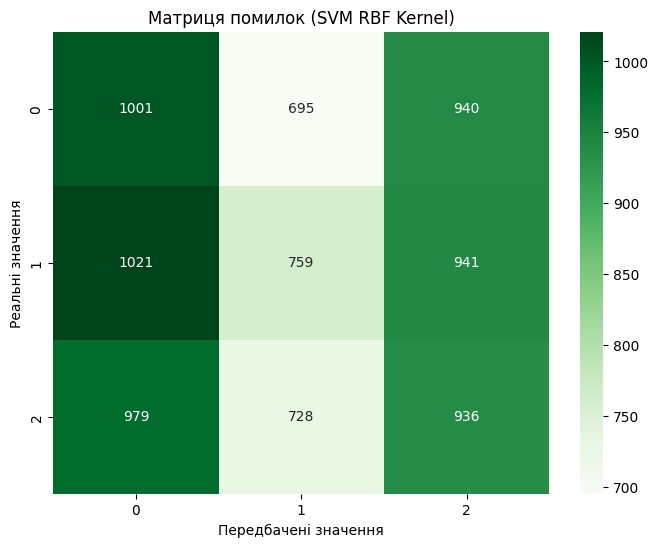

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv('../DATASETS/L3/cybersecurity_attacks.csv')

cols_to_drop = [
    'Timestamp', 'Source IP Address', 'Destination IP Address', 
    'Payload Data', 'User Information', 'Device Information', 
    'Attack Signature', 'Geo-location Data', 'Proxy Information', 'Firewall Logs'
]
df = df.drop(columns=[c for c in cols_to_drop if c in df.columns])

le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col].astype(str))

X = df.drop(columns=['Attack Type'])
y = df['Attack Type']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

clf = SVC(kernel='rbf', C=1.0, gamma='scale')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(f"Оновлена точність (Accuracy): {accuracy_score(y_test, y_pred):.4f}")
print("\nДетальний звіт про класифікацію:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Матриця помилок (SVM RBF Kernel)')
plt.ylabel('Реальні значення')
plt.xlabel('Передбачені значення')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../DATASETS/L3/passwords.csv') 

vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(2, 4))
X = vectorizer.fit_transform(df['password'].astype(str))
y = df['strength']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

clf = SVC(kernel='rbf', C=1.0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(f"Точність: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Точність: 0.8218

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.03      0.05      2669
           1       0.81      1.00      0.89     14878
           2       0.95      0.64      0.76      2453

    accuracy                           0.82     20000
   macro avg       0.86      0.55      0.57     20000
weighted avg       0.83      0.82      0.76     20000


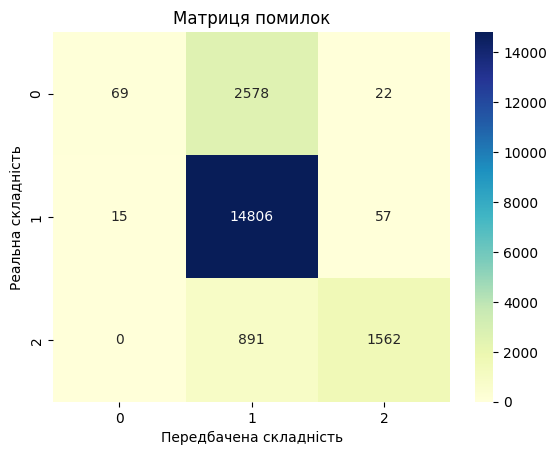

In [12]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Матриця помилок')
plt.ylabel('Реальна складність')
plt.xlabel('Передбачена складність')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../DATASETS/L3/passwords.csv")

vectorizer = TfidfVectorizer(analyzer="char", ngram_range=(2, 4))
X = vectorizer.fit_transform(df["password"].astype(str))
y = df["strength"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

clf = SVC(kernel="linear", C=1.0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(f"Точність: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Точність: 0.8340

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.11      0.20      2669
           1       0.82      0.99      0.90     14878
           2       0.96      0.68      0.79      2453

    accuracy                           0.83     20000
   macro avg       0.84      0.59      0.63     20000
weighted avg       0.83      0.83      0.79     20000



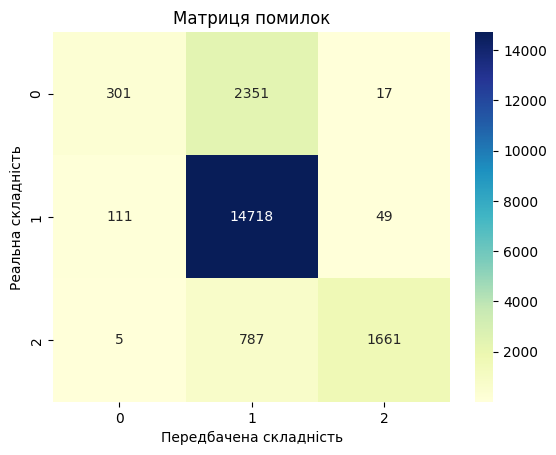

In [3]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Матриця помилок")
plt.ylabel("Реальна складність")
plt.xlabel("Передбачена складність")
plt.show()